In [1]:
from numpy import *
from netCDF4 import * 
from datetime import *

nc_path='/home/mhung/Downloads/wrfout_d02_2019-11-12_sample.nc'
nc_file=Dataset(nc_path,'r')

In [10]:
for name in nc_file.variables.keys():
    if (name not in nc_file.dimensions.keys()):
        data=nc_file.variables[name]
        print(name,'\t',data.units,'\t\t',data.shape,'\t',data.dtype,'\t',data.dimensions)

data=squeeze(nc_file.variables['T2'][:])
print('\nshape of the data: ',data.shape)

lat=squeeze(nc_file.variables['XLAT'][:])
lon=squeeze(nc_file.variables['XLONG'][:])
print('shape of lat and long: ',lat.shape,lon.shape)

a=zeros((1,1,200,300))
b=squeeze(a)
print('shape of b: ', b.shape)










XLONG 	 degree_east 		 (120, 111) 	 float32 	 ('south_north', 'west_east')
XLAT 	 degree_north 		 (120, 111) 	 float32 	 ('south_north', 'west_east')
Q2 	 kg kg-1 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
T2 	 K 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
PSFC 	 Pa 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
U10 	 m s-1 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
V10 	 m s-1 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
RAINNC 	 mm 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')

shape of the data:  (24, 120, 111)
shape of lat and long:  (120, 111) (120, 111)
shape of b:  (200, 300)


[15.135742 17.183807 19.453674 21.394775 22.581238 23.828278 24.81781
 25.455994 25.06189  23.930817 22.243774 20.250763 19.711151 20.947754
 20.797516 20.592804 20.34314  20.137115 19.537842 19.352936 18.737732
 18.412323 18.73462  18.893127]


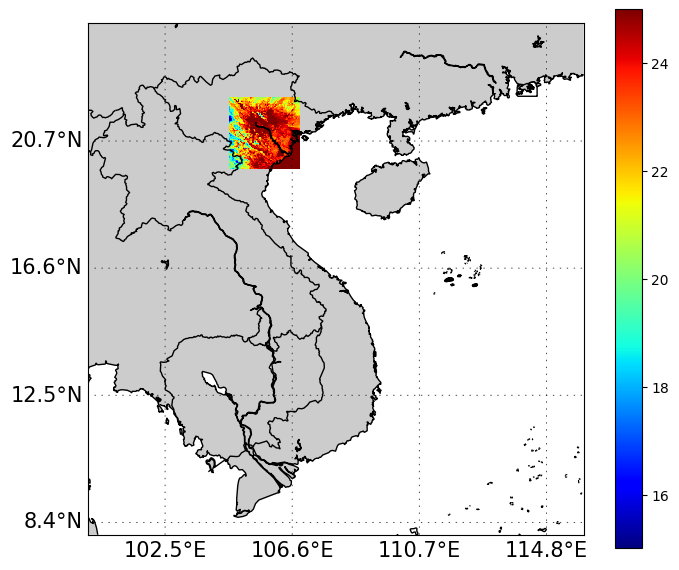

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm

fig=plt.figure(figsize=(8,7))
ax=fig.add_subplot(1,1,1)

lon_min=100
lon_max=116
lat_min=8
lat_max=24.5

map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
map2.fillcontinents(zorder=0)
map2.drawcoastlines(zorder=11)
map2.drawcountries(linewidth=1,color='k')


#draw the lat and lon
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)



map2.readshapefile('/home/mhung/Documents/python/Data-visualization/Islands/haidao','haidao',linewidth=1,color='k')

cm=plt.pcolormesh(lon,lat,data[12,:,:]-273.15,vmin=15,vmax=25,cmap='jet')

print(data[:,0,0]-273.3)
plt.colorbar()
plt.show()


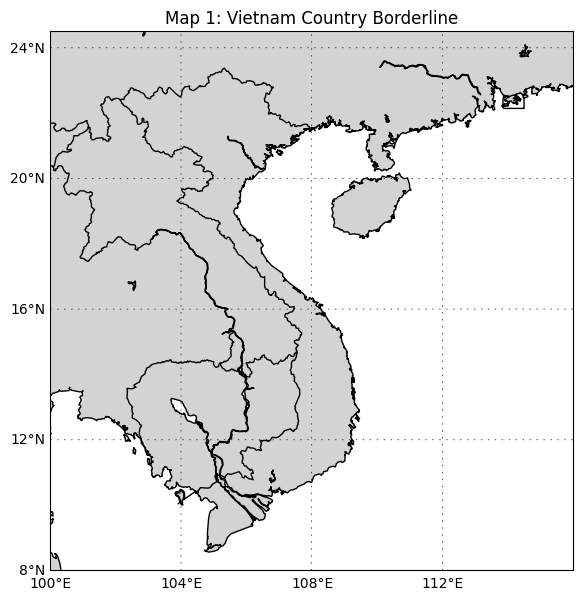

OSError: cannot locate /path/to/shapefile/vietnam_provinces.shp

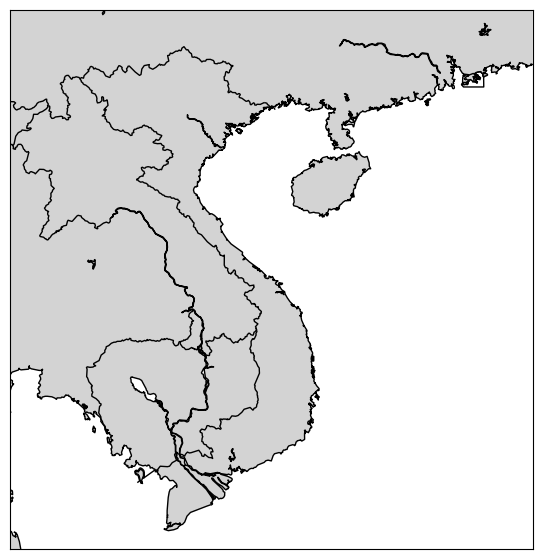

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Define map boundaries for Vietnam
lon_min = 100
lon_max = 116
lat_min = 8
lat_max = 24.5

# Create the first figure (Vietnam borders only)
fig1 = plt.figure(figsize=(8, 7))
ax1 = fig1.add_subplot(1, 1, 1)

# Map projection setup
map1 = Basemap(projection='merc',
               llcrnrlon=lon_min, llcrnrlat=lat_min,
               urcrnrlon=lon_max, urcrnrlat=lat_max,
               resolution='i', epsg=4326, ax=ax1)

# Fill continents and draw boundaries
map1.fillcontinents(color='lightgray', zorder=0)
map1.drawcoastlines(zorder=11)
map1.drawcountries(linewidth=1, color='k')

# Draw the latitude and longitude grid lines
parallels = np.arange(lat_min, lat_max, 4)
meridians = np.arange(lon_min, lon_max, 4)
map1.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=10, zorder=12)
map1.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=10, zorder=12)

plt.title("Map 1: Vietnam Country Borderline")
plt.show()

# Create the second figure (Vietnam with provinces)
fig2 = plt.figure(figsize=(8, 7))
ax2 = fig2.add_subplot(1, 1, 1)

# Map projection setup
map2 = Basemap(projection='merc',
               llcrnrlon=lon_min, llcrnrlat=lat_min,
               urcrnrlon=lon_max, urcrnrlat=lat_max,
               resolution='i', epsg=4326, ax=ax2)

# Fill continents and draw boundaries
map2.fillcontinents(color='lightgray', zorder=0)
map2.drawcoastlines(zorder=11)
map2.drawcountries(linewidth=1, color='k')

# Load the shapefile for Vietnam's provinces (adjust path to your local setup)
map2.readshapefile('/path/to/shapefile/vietnam_provinces', 'provinces', linewidth=1, color='blue')

# Draw the latitude and longitude grid lines
map2.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=10, zorder=12)
map2.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=10, zorder=12)

plt.title("Map 2: Vietnam with Province Borders")
plt.show()
